In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")

/home/himangsu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('/home/himangsu/Code/Python/notebookenv/ML_Models/Linear_Regression/A6_Obesity.csv')

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          498 non-null    object 
 1   Age                             498 non-null    int64  
 2   Height                          498 non-null    float64
 3   Weight                          498 non-null    float64
 4   family_history_with_overweight  498 non-null    object 
 5   FAVC                            498 non-null    object 
 6   FCVC                            498 non-null    int64  
 7   NCP                             498 non-null    int64  
 8   CAEC                            498 non-null    object 
 9   SMOKE                           498 non-null    object 
 10  CH2O                            498 non-null    int64  
 11  SCC                             498 non-null    object 
 12  FAF                             498 

In [5]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
dtype: int64

In [6]:
# Dealing With Categorical Variables, creagting dummie
clean_data = pd.get_dummies(df,drop_first=True,dtype=int)
clean_data.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes
0,21,1.62,64.0,2,3,2,0,0,1,0,0,1,0,0,0
1,21,1.52,56.0,3,3,3,3,0,1,0,0,1,0,1,1
2,23,1.80,77.0,2,3,2,2,1,1,0,0,1,0,0,0
3,27,1.80,87.0,3,3,2,2,1,0,0,0,1,0,0,0
4,22,1.78,89.8,2,1,2,0,1,0,0,0,1,0,0,0


In [7]:
clean_data.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'Gender_Male',
       'family_history_with_overweight_yes', 'FAVC_yes', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes'],
      dtype='object')

In [8]:
df=clean_data

In [9]:
numerical_cols=['Age','Height','Weight','FCVC','NCP','CH2O','FAF']

for col in numerical_cols:
    df[col]= (df[col]-df[col].min())/(df[col].max()-df[col].min())

In [10]:
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes
0,0.148936,0.320755,0.186567,0.5,0.666667,0.5,0.000000,0,1,0,0,1,0,0,0
1,0.148936,0.132075,0.126866,1.0,0.666667,1.0,1.000000,0,1,0,0,1,0,1,1
2,0.191489,0.660377,0.283582,0.5,0.666667,0.5,0.666667,1,1,0,0,1,0,0,0
3,0.276596,0.660377,0.358209,1.0,0.666667,0.5,0.666667,1,0,0,0,1,0,0,0
4,0.170213,0.622642,0.379104,0.5,0.000000,0.5,0.000000,1,0,0,0,1,0,0,0


In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import preprocessing
import plotly.express as px
from sklearn.datasets import make_blobs
plt.style.use('dark_background')

In [12]:
class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters # cluster number
        self.max_iterations = 100 # max iteration. don't want to run inf time
        self.num_examples, self.num_features = X.shape # num of examples, num of features
        self.plot_figure = True # plot figure
        
    # randomly initialize centroids
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero 
        for k in range(self.K): # iterations of 
            centroid = X[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids
    
    # create cluster Function
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            ) # closest centroid using euler distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        return clusters 
    
    # new centroids
    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids
    
    # prediction
    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred
    
    # plotinng scatter plot
    def plot_fig(self, X, y):
        fig = px.scatter(X[:, 0], X[:, 1], color=y)
        fig.show() # visualize
        
    # fit data
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # initialize random centroids
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids) # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
            diff = centroids - previous_centroids # calculate difference
            if not diff.any():
                break
        y_pred = self.predict_cluster(clusters, X) # predict function
        if self.plot_figure: # if true
            self.plot_fig(X, y_pred) # plot function 
        return y_pred
            
if __name__ == "__main__":
    np.random.seed(10)
    num_clusters = 3 # num of cluster
    X,_ = make_blobs(n_samples=1000, n_features=2, centers=num_clusters) # create dataset using make_blobs from sklearn datasets
    Lmeans = KMeansClustering(X, num_clusters)
    y_pred = Lmeans.fit(X)

In [58]:
kmeans = cluster.KMeans(n_clusters=2, init='k-means++') # ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
kmeans.fit(clean_data)

KMeans(n_clusters=2)

In [59]:
kmeans.inertia_

729.2180634840864

Text(0, 0.5, 'Inertia')

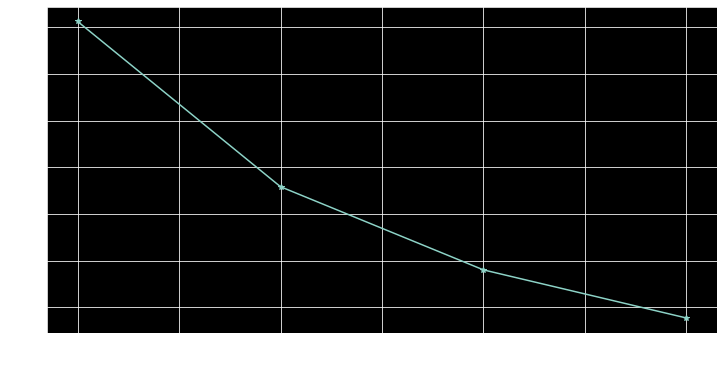

In [60]:
SSE = []
for i in range(1,5):
    kmeans = cluster.KMeans(n_clusters = i, init='k-means++') # iterate from range (1, 20)
    kmeans.fit(clean_data)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,5), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker="*")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


In [46]:
kmeans = cluster.KMeans(n_clusters=2, init='k-means++') # ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
kmeans.fit(clean_data)

KMeans(n_clusters=2)

In [45]:
kmeans.inertia_

195.35685947311416